##                      PROJECT ON HEALTH INSURANCE PURCHASE

In [33]:
## importing the necessary libraries and dataset

import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


df=pd.read_csv('TRAIN.csv') 
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494240
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [34]:
# checking for null values
df.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [35]:
df.info

<bound method DataFrame.info of             age     sex        bmi smoker     region  children       charges
0     21.000000    male  25.745000     no  northeast         2   3279.868550
1     36.976978  female  25.744165    yes  southeast         3  21454.494240
2     18.000000    male  30.030000     no  southeast         1   1720.353700
3     37.000000    male  30.676891     no  northeast         3   6801.437542
4     58.000000    male  32.010000     no  southeast         1  11946.625900
...         ...     ...        ...    ...        ...       ...           ...
3625  48.820767  female  41.426984     no  northwest         4  10987.324960
3626  38.661977  female  26.202557     no  southeast         2  11735.844350
3627  56.000000    male  40.300000     no  southwest         0  10602.385000
3628  48.061207  female  34.930624     no  southeast         1   8976.140452
3629  37.598865  female  25.219233     no  northeast         3   7027.698968

[3630 rows x 7 columns]>

In [36]:
## getting basic information about the dataset
df.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807221
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


In [37]:
df.columns

Index(['age', 'sex', 'bmi', 'smoker', 'region', 'children', 'charges'], dtype='object')

In [38]:
## getting the number of male and female in our dataset
df['sex'].value_counts()

sex
male      2029
female    1601
Name: count, dtype: int64

<Axes: xlabel='smoker'>

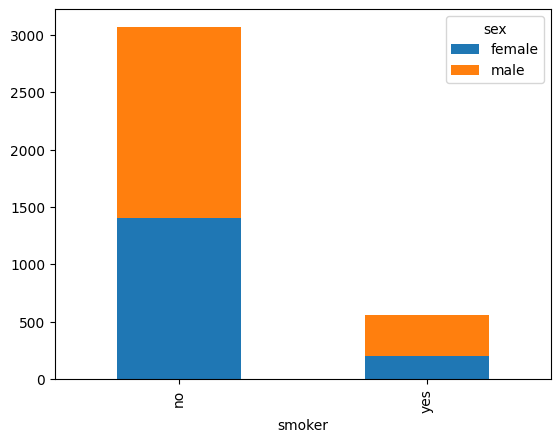

In [39]:
## getting the number of male and female in our dataset

df.groupby(['smoker','sex']).size().unstack().plot(kind='bar',stacked=True)

In [40]:
## getting the number of those coming from the various regions in our dataset
df['region'].value_counts()

region
southeast    1021
northwest     911
southwest     850
northeast     848
Name: count, dtype: int64

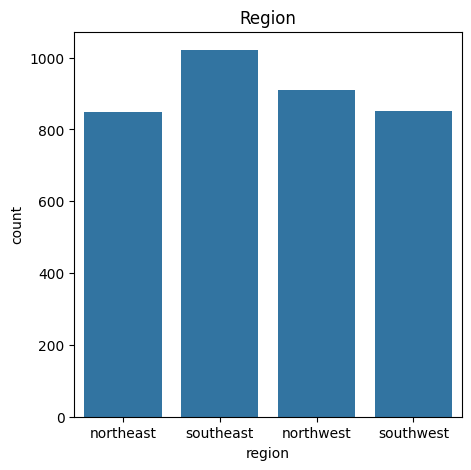

In [41]:
# the effect of charges base on the region

plt.figure(figsize=(5,5))
sns.countplot(x='region', data=df)
plt.title('Region')
plt.show()

In [42]:
df.groupby(['smoker','sex']).count()

age   bmi  region  children  charges
smoker sex                                          
no     female  1405  1405    1405      1405     1405
       male    1665  1665    1665      1665     1665
yes    female   196   196     196       196      196
       male     364   364     364       364      364

Text(0.5, 1.0, 'Cost vs Region')

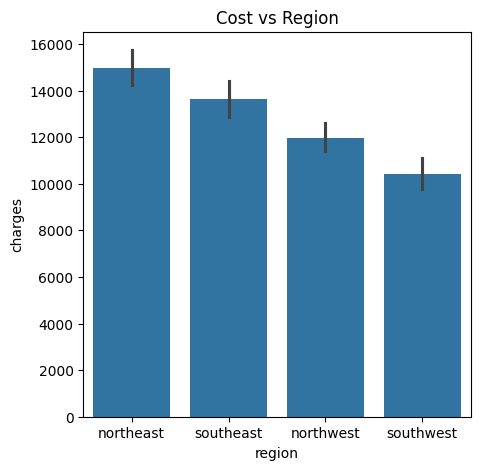

In [43]:

plt.figure(figsize=(5,5))
sns.barplot(x='region', y='charges', data=df)
plt.title('Cost vs Region')

Text(0.5, 1.0, 'Charges for smokers')

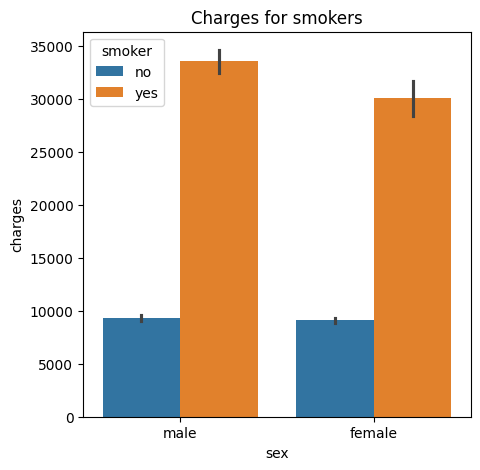

In [44]:
## the effect of charges to smokers
plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges',hue='smoker', data=df)
plt.title('Charges for smokers')

In [45]:
## implimenting label encoding

enc = LabelEncoder()
df['sex']=enc.fit_transform(df['sex']) 
df['smoker']=enc.fit_transform(df['smoker'])
df['region']=enc.fit_transform(df['region'])
df

,age,sex,bmi,smoker,region,children,charges
0,21.000000,1,25.745000,0,0,2,3279.868550
1,36.976978,0,25.744165,1,2,3,21454.494240
2,18.000000,1,30.030000,0,2,1,1720.353700
3,37.000000,1,30.676891,0,0,3,6801.437542
4,58.000000,1,32.010000,0,2,1,11946.625900
...,...,...,...,...,...,...,...
3625,48.820767,0,41.426984,0,1,4,10987.324960
3626,38.661977,0,26.202557,0,2,2,11735.844350
3627,56.000000,1,40.300000,0,3,0,10602.385000
3628,48.061207,0,34.930624,0,2,1,8976.140452


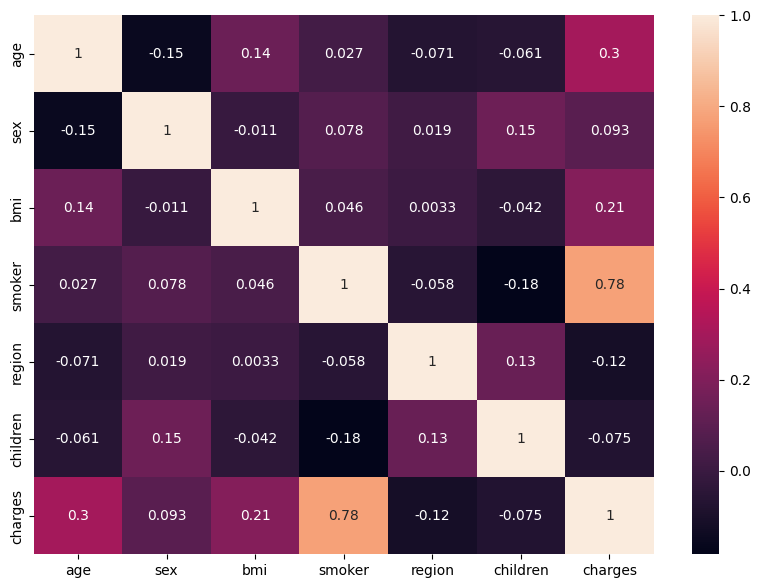

In [46]:
## getting correlated features with target variables
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [47]:
# splitting up our dataset into features x , and target y

x=df.drop(columns=['charges'],axis=1)

In [48]:
x

,age,sex,bmi,smoker,region,children
0,21.000000,1,25.745000,0,0,2
1,36.976978,0,25.744165,1,2,3
2,18.000000,1,30.030000,0,2,1
3,37.000000,1,30.676891,0,0,3
4,58.000000,1,32.010000,0,2,1
...,...,...,...,...,...,...
3625,48.820767,0,41.426984,0,1,4
3626,38.661977,0,26.202557,0,2,2
3627,56.000000,1,40.300000,0,3,0
3628,48.061207,0,34.930624,0,2,1


In [49]:
y=df['charges']

In [50]:
y

0        3279.868550
1       21454.494240
2        1720.353700
3        6801.437542
4       11946.625900
            ...     
3625    10987.324960
3626    11735.844350
3627    10602.385000
3628     8976.140452
3629     7027.698968
Name: charges, Length: 3630, dtype: float64

In [51]:
# splitiing our dataset into x_train, and y_train
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=25)

In [52]:
## standardizing our training sets
sc = StandardScaler()
sc.fit(x_train)
x_train=sc.transform(x_train) 
x_test=sc.transform(x_test)

In [53]:
import pickle
pickle.dump(sc,open('scaling.pkl','wb'))

In [54]:
# inertialising our model
model=LinearRegression()

In [55]:
# training and predicting our model

model.fit(x_train,y_train)
y_pred = model.predict(x_test)
r2_score(y_test,y_pred)

0.7350190296491648

In [56]:
y_pred[:10]

array([ 8783.35759205,  5548.22278055,  6344.20095051,  9429.71787761,
        4736.65880642, 36179.69379887,  8929.95995873,  5314.4757562 ,
        5395.6923671 , 33538.56907637])

In [57]:
y_test[:10]

359      6951.199011
1311     4828.514248
1006     4347.023350
354      9634.152291
1557     1826.843000
2030    41920.079430
340     18638.613220
1541     5127.607696
2894     4772.875889
2259    22198.875700
Name: charges, dtype: float64

In [58]:
## getting the featues that influence our model greatly

from sklearn.inspection import permutation_importance
r = permutation_importance(model, x_test, y_test,
                           n_repeats=30,
                           random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df.columns[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

smoker  1.184 +/- 0.046
age     0.149 +/- 0.009
bmi     0.044 +/- 0.004
children0.013 +/- 0.003
region  0.009 +/- 0.002
sex     0.006 +/- 0.002


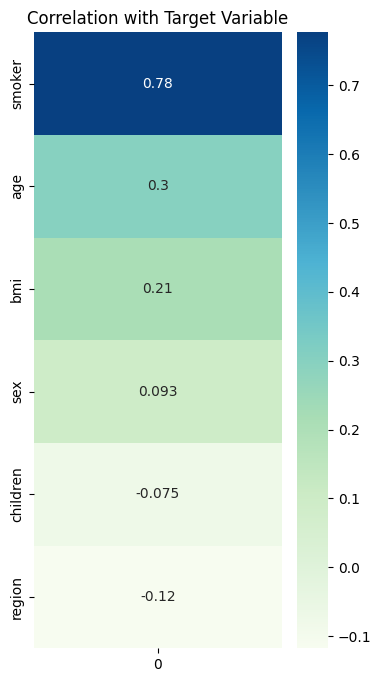

In [59]:
# Create a correlation matrix with target variable
corr_with_target = x.corrwith(y)

# Sort features by correlation with target variable
corr_with_target = corr_with_target.sort_values(ascending=False)

# Plot the heatmap
plt.figure(figsize=(4, 8))
sns.heatmap(corr_with_target.to_frame(), cmap='GnBu', annot=True)
plt.title('Correlation with Target Variable')
plt.show()

In [60]:
cost_pred = model.predict([[50,1,25,2,1,2]])
print("The medical insurance cost of the new customer is: ", cost_pred)

The medical insurance cost of the new customer is:  [204823.01534368]


## Pickling The Model file For Deployment

In [61]:

import pickle

In [62]:
pickle.dump(model,open('regmodel.pkl','wb'))

In [63]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [64]:
x_test.shape

(908, 6)